In [1]:
# Copyright Tay Zhi Cong, year 2025

import numpy as np 
import matplotlib.pyplot as plt 
from scipy import signal 
import math

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


beta is 5.65326
filter length is 372
shape of out_fft (5096,)
shape of w (5096,)
x1 shape: (200,)
b shape: (19,)
length of out is (4360,)
length of first_path_result is (218,)


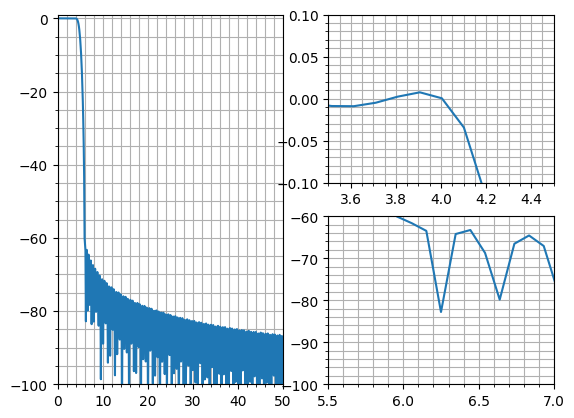

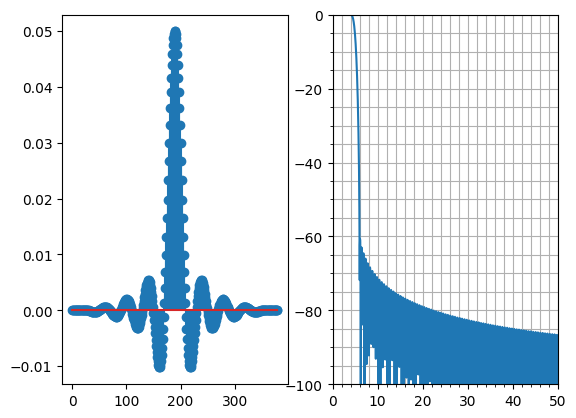

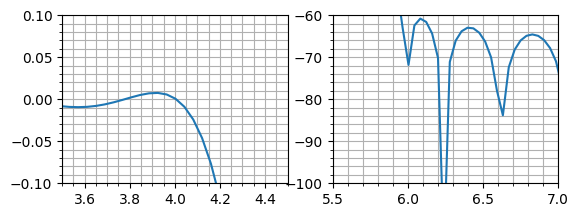

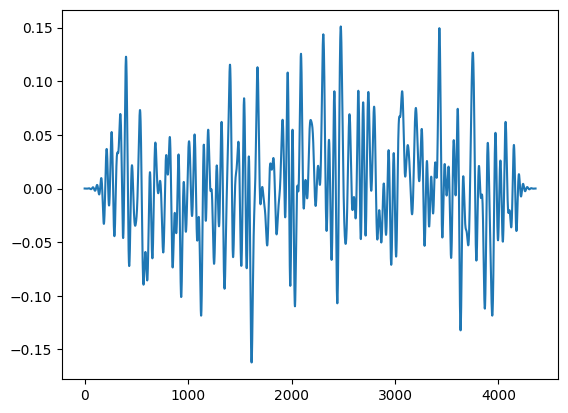

In [2]:
beta = signal.kaiser_beta(60) # 1. calculate the kaiser beta
filter_length = math.ceil((200/2) * (60-8)/14) # 2. estimate the filter length : N ~= f_sampling/ f_transition * (Attenuation (in dB) - 8) / 14
print('beta is', beta)
print('filter length is', filter_length)

# Method 1
# filter_tap = signal.windows.kaiser(filter_length, beta=beta)
# hh1=np.sinc(0.2*np.linspace(-37,37,75))*filter_tap

# Method 2
filter_length = 380
b_orig = signal.firwin(filter_length, 5, window=('kaiser', beta), fs=200)
w, h = signal.freqz(b_orig, worN=1024)

# investigate that method1 and method2 returns identical filter weights
#print(hh1/sum(hh1)-b)
plt.figure()
ax = plt.subplot(1,2,1)
plt.plot(w/np.pi*100, 20 * np.log10(abs(h)), 'C0')
plt.grid(which="major")
plt.grid(which="minor")
plt.minorticks_on()
ax.set_xlim(0, 50)
ax.set_ylim(-100, 1)

ax = plt.subplot(2,2,2)
plt.plot(w/2/(np.pi)*200, 20 * np.log10(abs(h)), 'C0')
plt.grid(which="major")
plt.grid(which="minor")
plt.minorticks_on()

# Define the desired zoom region
x_min, x_max = 3.5, 4.5
y_min, y_max = -0.1, 0.1

# Set the x and y limits of the axes to zoom to the rectangle
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)


ax = plt.subplot(2,2,4)
plt.plot(w/2/(np.pi)*200, 20 * np.log10(abs(h)), 'C0')
plt.grid(which="major")
plt.grid(which="minor")
plt.minorticks_on()

# Define the desired zoom region
x_min, x_max = 5.5, 7
y_min, y_max = -100, -60

# Set the x and y limits of the axes to zoom to the rectangle
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

n = np.arange(0, 1000, 1)
x1_orig = np.exp(1j*2*np.pi*n*21/100);
b = np.reshape(b_orig, (19, 20))
x1 = np.reshape(x1_orig, (50, 20))


plt.figure()
ax = plt.subplot(1,2,1)

# output_reg = np.zeros((1,218))
# for i in range(5):
#     output_reg = output_reg + np.convolve(x1[:,i], b[:,i]/sum(b[:,i]))
# # first_path_result = np.convolve(x1[:,0], b[:,0]/sum(b[:,0]))
# print(output_reg)
impulse_response = [1] 
first_path_result = np.convolve(impulse_response, b[:,0])
second_path_result = np.convolve(impulse_response, b[:,1])
third_path_result = np.convolve(impulse_response, b[:,2])
forth_path_result = np.convolve(impulse_response, b[:,3])
fifth_path_result = np.convolve(impulse_response, b[:,4])
sixth_path_result = np.convolve(impulse_response, b[:,5])
seventh_path_result = np.convolve(impulse_response, b[:,6])
eighth_path_result = np.convolve(impulse_response, b[:,7])
ninth_path_result = np.convolve(impulse_response, b[:,8])
tenth_path_result = np.convolve(impulse_response, b[:,9])
eleventh_path_result = np.convolve(impulse_response, b[:,10])
twelveth_path_result = np.convolve(impulse_response, b[:,11])
thirteenth_path_result = np.convolve(impulse_response, b[:,12])
forteenth_path_result = np.convolve(impulse_response, b[:,13])
fifteenth_path_result = np.convolve(impulse_response, b[:,14])
sixteenth_path_result = np.convolve(impulse_response, b[:,15])
seventeenth_path_result = np.convolve(impulse_response, b[:,16])
eighteenth_path_result = np.convolve(impulse_response, b[:,17])
nineteenth_path_result = np.convolve(impulse_response, b[:,18])
twentieth_path_result = np.convolve(impulse_response, b[:,19])
out = np.array(list(zip(first_path_result,second_path_result, third_path_result, forth_path_result, fifth_path_result, sixth_path_result, 
                       seventh_path_result, eighth_path_result, ninth_path_result, tenth_path_result, eleventh_path_result, 
                       twelveth_path_result, thirteenth_path_result, forteenth_path_result, fifteenth_path_result, 
                       sixteenth_path_result, seventeenth_path_result, eighteenth_path_result, nineteenth_path_result, twentieth_path_result
                       ))).ravel()
plt.stem(out)

ax = plt.subplot(1,2,2)
# fft no need to divide by N at the front?
out_fft = np.fft.fft(out, 5096)
w = np.arange(0, 5096, 1)/5096 * 200
print('shape of out_fft', out_fft.shape)
print('shape of w', w.shape)
plt.plot(w, 20*np.log10(np.abs(out_fft)))
plt.ylim(-100, 0)
plt.xlim(0, 50)
plt.grid(which="major")
plt.grid(which="minor")
plt.minorticks_on()

plt.figure()
ax = plt.subplot(2,2,1)
plt.plot(w, 20*np.log10(np.abs(out_fft)))
plt.ylim(-0.1, 0.1)
plt.xlim(3.5, 4.5)
plt.grid(which="major")
plt.grid(which="minor")
plt.minorticks_on()

ax = plt.subplot(2,2,2)
plt.plot(w, 20*np.log10(np.abs(out_fft)))
plt.ylim(-100, -60)
plt.xlim(5.5, 7)
plt.grid(which="major")
plt.grid(which="minor")
plt.minorticks_on()

#x1 = np.exp(2j*np.pi*np.arange(0,200,1)*3/20)
x1 = np.random.randn(200,1)

x1 = np.reshape(x1, -1)
print('x1 shape:', x1.shape)
print('b shape:', b[:,0].shape)

# do i need to divide by sum(b[:,0])
# first_path_result = np.convolve(x1, b[:,0]/sum(b[:,0]))
# second_path_result = np.convolve(x1, b[:,1]/sum(b[:,1]))
# third_path_result = np.convolve(x1, b[:,2]/sum(b[:,2]))
# forth_path_result = np.convolve(x1, b[:,3]/sum(b[:,3]))
# out = np.array(list(zip(first_path_result,second_path_result, third_path_result, forth_path_result))).ravel()
first_path_result = np.convolve(x1, b[:,0])
second_path_result = np.convolve(x1, b[:,1])
third_path_result = np.convolve(x1, b[:,2])
forth_path_result = np.convolve(x1, b[:,3])
fifth_path_result = np.convolve(x1, b[:,4])
sixth_path_result = np.convolve(x1, b[:,5])
seventh_path_result = np.convolve(x1, b[:,6])
eighth_path_result = np.convolve(x1, b[:,7])
ninth_path_result = np.convolve(x1, b[:,8])
tenth_path_result = np.convolve(x1, b[:,9])
eleventh_path_result = np.convolve(x1, b[:,10])
twelveth_path_result = np.convolve(x1, b[:,11])
thirteenth_path_result = np.convolve(x1, b[:,12])
forteenth_path_result = np.convolve(x1, b[:,13])
fifteenth_path_result = np.convolve(x1, b[:,14])
sixteenth_path_result = np.convolve(x1, b[:,15])
seventeenth_path_result = np.convolve(x1, b[:,16])
eighteenth_path_result = np.convolve(x1, b[:,17])
nineteenth_path_result = np.convolve(x1, b[:,18])
twentieth_path_result = np.convolve(x1, b[:,19])
out = np.array(list(zip(first_path_result,second_path_result, third_path_result, forth_path_result, fifth_path_result, sixth_path_result, 
                       seventh_path_result, eighth_path_result, ninth_path_result, tenth_path_result, eleventh_path_result, 
                       twelveth_path_result, thirteenth_path_result, forteenth_path_result, fifteenth_path_result, 
                       sixteenth_path_result, seventeenth_path_result, eighteenth_path_result, nineteenth_path_result, twentieth_path_result
                       ))).ravel()
plt.figure()
plt.plot(out)
print('length of out is', out.shape)
print('length of first_path_result is', first_path_result.shape)

# out = first_path_result+second_path_result+third_path_result+forth_path_result
# print()
# plt.plot(np.real(out[19:218-19]))

# out = out[19:218-19]
# ax = plt.subplot(1,2,2)
# out_fft = 1/len(out) * np.fft.fft(out, 1024)
# #out_fft = np.fft.fft(np.exp(2j * np.pi * np.arange(0, 2048, 1)*3 / 8))
# plt.plot(20*np.log10(np.abs(out_fft)))
# ax.set_xlim(0, 1024)
# ax.set_ylim(-150, -70)
# print(np.arange(8))
# # plt.plot(np.real(first_path_result))
# # plt.plot(np.real(second_path_result))
# # # plt.plot(np.real(np.convolve(x1[:,0], b[:,0])))
# # # plt.plot(np.real(np.convolve(x1[:,1], b[:,1])))
# # fft_first_path_result = np.fft.fftshift(np.fft.fft(20*np.log10(abs(first_path_result)),1024))
# # plt.plot(np.real(first_path_result))
# # plt.plot(np.real(x1[:,0]))
# # #print(x1)

# x2 = x1_orig + np.exp(1j*2*np.pi*n*1.5/100);
# x2 = np.reshape(x2, (200,5))
# first_path_result = np.convolve(x1[:,0], b[:,0]/sum(b[:,0]))

# plt.figure()
# ax = plt.subplot(1,2,1)

# # output_reg = np.zeros((1,218))
# # for i in range(5):
# #     output_reg = output_reg + np.convolve(x1[:,i], b[:,i]/sum(b[:,i]))
# # # first_path_result = np.convolve(x1[:,0], b[:,0]/sum(b[:,0]))
# # print(output_reg)
# first_path_result = np.convolve(x2[:,0], b[:,0])
# second_path_result = np.convolve(x2[:,1], b[:,1])
# third_path_result = np.convolve(x2[:,2], b[:,2])
# forth_path_result = np.convolve(x2[:,3], b[:,3])
# out = first_path_result+second_path_result+third_path_result+forth_path_result
# print()
# plt.plot(np.real(out[19:218-19]))

# out = out[19:218-19]
# ax = plt.subplot(1,2,2)
# out_fft = 1/len(out) * np.fft.fft(out, 512)
# #out_fft = np.fft.fft(np.exp(2j * np.pi * np.arange(0, 2048, 1)*3 / 8))
# plt.plot(20*np.log10(np.abs(out_fft)))
# ax.set_xlim(0, 512)
# #ax.set_ylim(-80, 0)
